# South East Asian Countries Debt Analysis 

### Table of Contents
* [Introduction](#intro)
* [Goals](#goals)
* [Data Information](#Data)
* [Data Cleaning](#cleaning)
* [Exploratory Data Analysis](#EDA)
    * [Distribution of Debt and Debt Service of SEA Countries](#eda1)
    * [SEA Countries with the Highest and Lowest Average Debt and Debt Service ](#eda2)
        * [SEA Countries Average Debt](#eda2.1)
        * [SEA Countries Average Debt Service](#eda2.2)
        * [Average Debt vs Average Debt Service of SEA Countries](#eda2.3)
    * [SEA Countries Debt Trend for the years 2012 to 2021](#eda3)
* [Conclusion](#conclusion)
* [Limitations](#limitations)

## Introduction <a id='intro'></a>

Southeast Asia is a diverse region, consisting of 11 countries with distinct cultures, traditions, and economic profiles. These countries are Brunei Darussalam, Cambodia, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore, Thailand, Timor-Leste, and Vietnam. While some of these countries have experienced significant economic growth and development in recent years, others remain categorized as low and middle-income countries.

The [World Bank](https://www.worldbank.org/en/country/mic/overview) uses a classification system to group the world's economies into four income categories: low, lower-middle, upper-middle, and high-income countries. This classification is updated annually on July 1st and is based on the Gross National Income (GNI) per capita in current US dollars. The criteria for lower-middle-income economies are those with a GNI per capita ranging from 1,036 USD to 4,045 USD, while upper-middle-income economies are those with a GNI per capita between 4,046 USD and 12,535 USD. 

This exploratory debt analysis project focuses on six Southeast Asian countries that are categorized as low and middle-income countries, namely Cambodia, Indonesia, Myanmar, Philippines, Thailand, and Vietnam. These countries face unique challenges in reducing poverty, improving access to basic services, and promoting sustainable economic growth, which have been further exacerbated by the COVID-19 pandemic.

The project aims to provide an overview of the public debt situation in these countries over a 10-year period which will give way for a more in-depth analysis and thereby support evidence-based decision-making and inform the development of policies and strategies to enhance economic stability, reduce public debt vulnerabilities, and promote sustainable economic growth in Southeast Asia.

## Goals <a class="anchor" id="Goals"></a>

The goal of this analysis is to analyze the external debt of low and middle-income countries in Southeast Asia for the years 2012 to 2021. The objectives are the following:
- Get acquainted with the data
- Make the data analysis-ready by cleaning it and getting the relevant data
- Form research questions
- Analyze variables within the data to gain insights on these questions

## Data Information <a class="anchor" id="Data"></a>

The data for this analysis was retreived from the World Bank's [International Debt Statistics](https://datacatalog.worldbank.org/search/dataset/0038015/International-Debt-Statistics). International Debt Statistics (IDS) provides a timely and comprehensive data on the external debt in low and middle-income countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#Load dataset
df = pd.read_csv('IDS_ALLCountries_Data.csv')

Some immediate insights on the data are:
- There are 76,820 rows and 66 columns in the dataset..
- There is a total of 137 countries included in the dataset.
- The South East Asian Countries that have data included in the dataset are: __Philippines, Indonesia, Cambodia, Myanmar, Thailand, and Vietnam.__ 
- The column number 6 to column number 65 contains data that can be compiled into a single column.

## Data Cleaning <a class="anchor" id="cleaning"></a>

Since the dataset is large and there are a total of 136 countries, the first step on the data cleaning process is to get only the data of the South East Asian countries that were included in the dataset as well as the series code of the total debt and total debt service. 

The following are the series codes that will be used for this analysis and their names and meaning:


`DT.DOD.DECT.CD`: External debt stocks, total (DOD (debt outstanding), current US$)
- Total external debt is debt owed to nonresidents repayable in currency, goods, or services. It is the sum of public, publicly guaranteed, and private nonguaranteed long-term debt, short-term debt, and use of IMF credit. Data are in current U.S. dollars.

`DT.TDS.DECT.CD`: Debt service on external debt, total (TDS (total debt service), current US$)
- Total debt service is the sum of principal repayments and interest actually paid in currency, goods, or services on long-term debt, interest paid on short-term debt, and repayments (repurchases and charges) to the IMF. Data are in current U.S. dollars.


In [3]:
#I will take the columns that I need in my analysis and then restructure it
sea_countries = df[df['Country Name'].isin(['Philippines', 'Indonesia', 'Cambodia', 'Myanmar', 'Thailand', 'Vietnam'])].reset_index(drop=True)

sea_countries = sea_countries[sea_countries['Series Code'].isin(['DT.DOD.DECT.CD', 'DT.TDS.DECT.CD'])]


value_vars = [str(year) for year in range(2012, 2022)]
sea_countries = pd.melt(frame=sea_countries,
                        id_vars=['Country Name', 'Series Code'],
                        value_vars=value_vars, value_name='Debt in USD', var_name='Year')

#pivot dataframe so the series codes will be columns
sea_countries = sea_countries.pivot_table(index=['Country Name', 'Year'],
                                          columns='Series Code', values='Debt in USD', margins=False)

#rename the columns
sea_countries = sea_countries.rename(columns={'DT.DOD.DECT.CD': 'Total Debt', 'DT.TDS.DECT.CD': 'Total Debt Service'}).reset_index()

sea_countries.head()

Series Code,Country Name,Year,Total Debt,Total Debt Service
0,Cambodia,2012,6.749243e+09,547347874.6
1,Cambodia,2013,7.619394e+09,617669078.9
2,Cambodia,2014,8.318518e+09,660620733.6
3,Cambodia,2015,9.436048e+09,691057522.3
4,Cambodia,2016,1.005954e+10,755932090.9


In [4]:
#I will change the data type of the column Year into integer
sea_countries['Year'] = sea_countries['Year'].astype(int)
sea_countries.dtypes

Series Code
Country Name           object
Year                    int32
Total Debt            float64
Total Debt Service    float64
dtype: object

__Check for Missing Values__

In [5]:
#count missing values
sea_countries.isna().sum()

Series Code
Country Name          0
Year                  0
Total Debt            0
Total Debt Service    0
dtype: int64

## Exploratory Data Analysis <a class="anchor" id="EDA"></a>

The variables that will be the focus of the EDA are `Country Name`, `Year`, and `Total Debt`, and `Total Debt Service`. The following research questions that the EDA seeks to answer are:

- How is the debt and debt service distributed among the various countries in Southeast Asia from 2012 to 2021?
- Which Southeast Asian country has the highest and lowest average debt and debt service, respectively?
- To what extent did the total debt and debt service of the Southeast Asian countries change over the course of the decade?

### Distribution of Debt and Debt Service of SEA Countries <a class="anchor" id="eda1"></a>
This section aims to answer the question:

    How is the debt and debt service distributed among the various countries in Southeast Asia from 2012 to 2021?
    
The distribution of the debt and debt service will be visualized and analyzed using a boxplot.

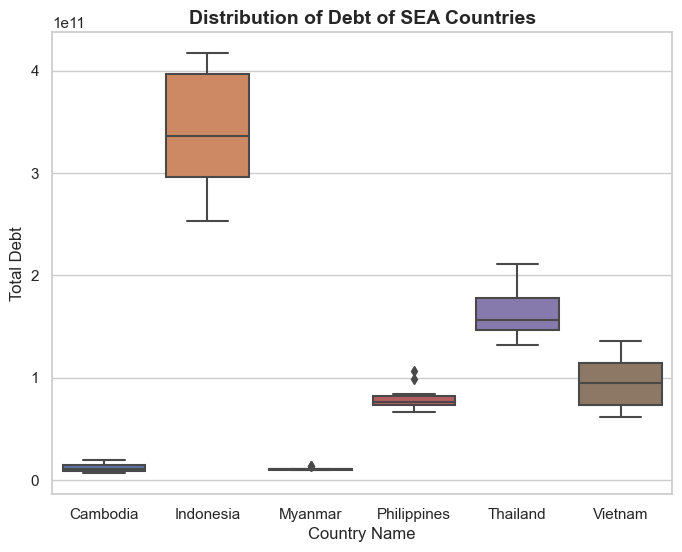

In [6]:
#visualization of the distribution of debt using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data = sea_countries, x = 'Country Name', y = 'Total Debt')
plt.title('Distribution of Debt of SEA Countries', fontsize=14, fontweight='bold')
plt.show()

The boxplot above shows that there is a difference between the variation in the distribution of debt among each countries in the South East Asia. Indonesia, in particular, stands out with the highest median value in comparison to the other countries, along with the largest range of debt variation. Conversely, Myanmar has the smallest range of debt variation. Furthermore, the graph depicts the presence of outliers within the data distribution for the Philippines.

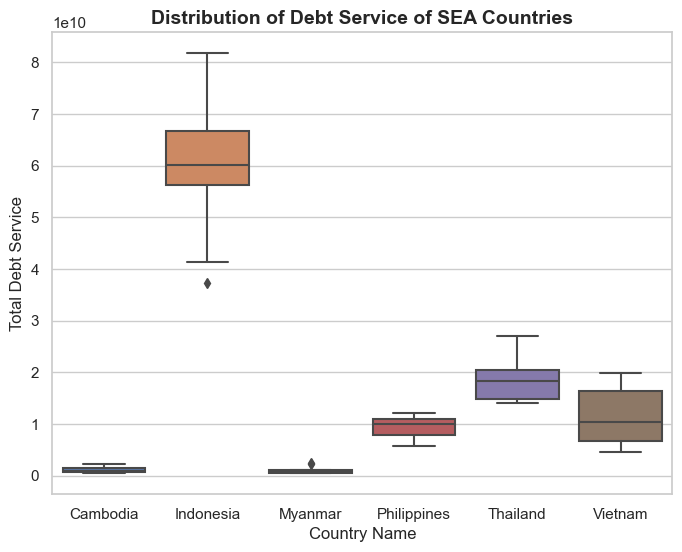

In [7]:
#visualization of the distribution of debt service using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data = sea_countries, x = 'Country Name', y = 'Total Debt Service')
plt.title('Distribution of Debt Service of SEA Countries', fontsize=14, fontweight='bold')
plt.show()

The boxplot above shows that there is a limited variation in the distribution of debt service among the Southeast Asian countries, except for Indonesia. Notably, Indonesia stands out with the highest median value in comparison to the other countries, along with the largest range of debt service variation. This observation aligns with the fact that Indonesia also holds the highest median debt among the Southeast Asian countries. Furthermore, the graph illustrates that Myanmar and Cambodia possess a similar debt service variation, with Myanmar having an outlier within its data distribution.

### SEA Countries with the Highest and Lowest Average Debt and Debt Service <a class="anchor" id="eda2"></a>

This section aims to answer the question:
    
    Which Southeast Asian country has the highest and lowest average debt and debt service, respectively?

The average debt and debt service for each countries will first be computed. Subsequently, a bar chart will be utilized to provide a visual representation of the results.

#### SEA Countries Average Debt <a class="anchor" id="eda2.1"></a>

In [8]:
#computation of mean debt of each countries, sorted
mean_debt = sea_countries.groupby('Country Name')['Total Debt'].mean().reset_index()
mean_debt_sorted = mean_debt.sort_values('Total Debt', ascending=False)
mean_debt_sorted

,Country Name,Total Debt
1,Indonesia,3.404299e+11
4,Thailand,1.642248e+11
5,Vietnam,9.526119e+10
3,Philippines,8.043628e+10
0,Cambodia,1.200723e+10
2,Myanmar,1.113559e+10


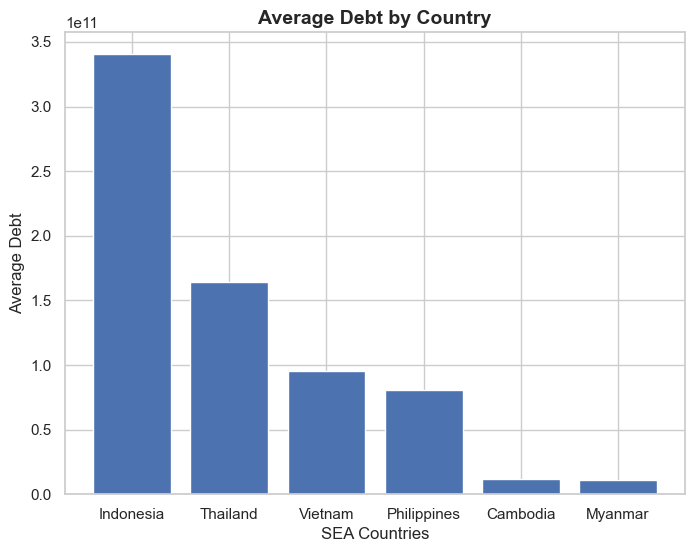

<Figure size 640x480 with 0 Axes>

In [9]:
#Comparison of the total average debt of SEA countries
plt.figure(figsize=(8,6))
plt.bar(mean_debt_sorted['Country Name'], mean_debt_sorted['Total Debt'])
plt.xlabel('SEA Countries')
plt.ylabel('Average Debt')
plt.title('Average Debt by Country', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

The graph above shows that Indonesia have the highest average debt among the Southeast Asian countries, with an average debt of approximately 329 billion in USD. On the other hand, Myanmar have the lowest average debt, which amounted to 11.1 billion in USD. As for the rest, the countries and their average debt are as follows: 159.7 billion, 91.5 billion, 79 billion, and 11.3 billion for Thailand, Vietnam, Philippines, and Cambodia, respectively.

#### SEA Countries Average Debt Service <a class="anchor" id="eda2.2"></a>

In [10]:
#computation of mean debt service of each countries, sorted
mean_debt_service = sea_countries.groupby('Country Name')['Total Debt Service'].mean().reset_index()
mean_debt_service_sorted = mean_debt_service.sort_values('Total Debt Service', ascending=False)

mean_debt_service_sorted

,Country Name,Total Debt Service
1,Indonesia,5.999338e+10
4,Thailand,1.875002e+10
5,Vietnam,1.142768e+10
3,Philippines,9.291466e+09
0,Cambodia,1.083122e+09
2,Myanmar,1.055995e+09


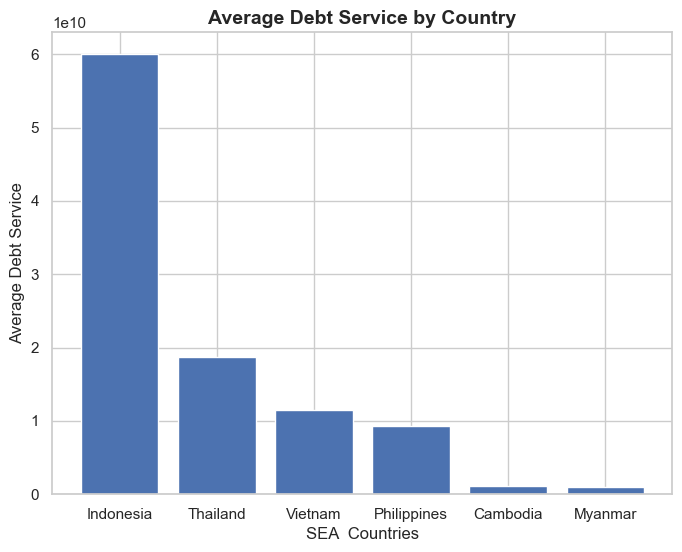

<Figure size 640x480 with 0 Axes>

In [11]:
#plot of the average debt
plt.figure(figsize=(8,6))
plt.bar(mean_debt_service_sorted['Country Name'], mean_debt_service_sorted['Total Debt Service'])
plt.xlabel('SEA  Countries')
plt.ylabel('Average Debt Service')
plt.title('Average Debt Service by Country', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

The graph above shows that Indonesia have the highest average debt service among the Southeast Asian countries, amounting to 57.3 billion in USD. On the other hand, Myanmar have the lowest average debt service, which amounted to 979 million in USD. As for the rest, the countries and their average debt service are as follows: 18 billion(apprx.), 10.8 billion(apprx.), 9.3 billion, and 1 billion for Thailand, Vietnam, Philippines, and Cambodia, respectively.

#### Average Debt vs Average Debt Service of SEA Countries <a class="anchor" id="eda2.3"></a>

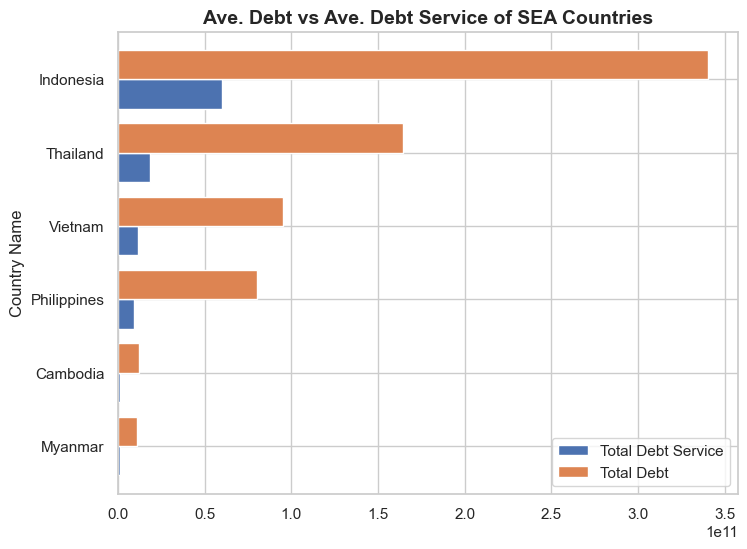

<Figure size 640x480 with 0 Axes>

In [12]:
#merge mean debt and mean debt service into one dataframe
mean_data = pd.merge(mean_debt_service_sorted, mean_debt_sorted, on='Country Name')
mean_data = mean_data.sort_values('Total Debt')
mean_data.set_index('Country Name', inplace=True)

#plot using side by side graph
ax = mean_data.plot(kind='barh', width=0.8, figsize=(8,6))
ax.set_title('Ave. Debt vs Ave. Debt Service of SEA Countries', fontsize=14, fontweight='bold')
plt.show()
plt.clf()

According to the graphs shown above, the average external debt is much higher compared to the average debt service for each countries. This could indicate that these countries have a high level of external debt relative to their ability to service that debt obligations.

### SEA Countries Debt Trend for the years 2012 to 2021 <a class="anchor" id="eda3"></a>

This section aims to answer the question:
    
     To what extent did the total debt and debt service of the South East Asian countries change over the course of the decade?
    
The methodology for addressing this question involves the summation of each country's annual debt, followed by the presentation of the trend using line graphs.

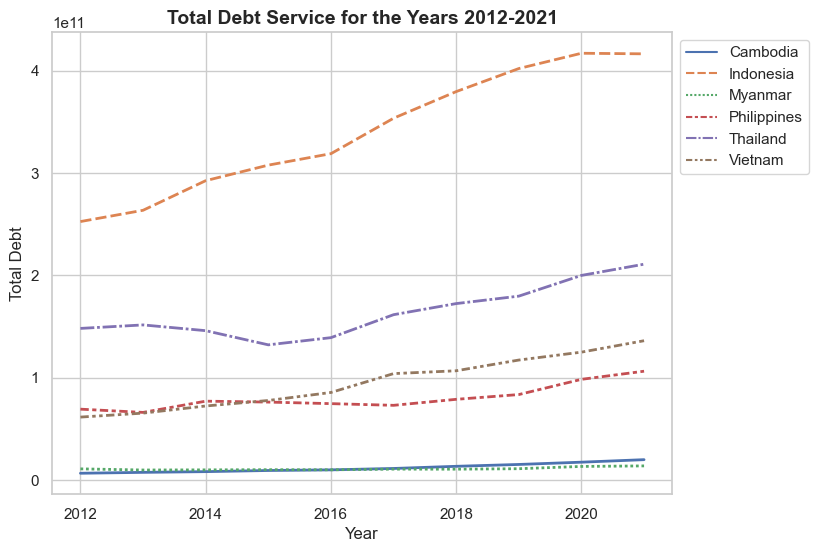

In [13]:
#debt trend of SEA countries
plt.figure(figsize=(8,6))
sns.lineplot(data = sea_countries, x='Year', y='Total Debt', hue = 'Country Name', style = 'Country Name', linewidth=2)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Total Debt Service for the Years 2012-2021', fontsize=14, fontweight='bold')
plt.show()

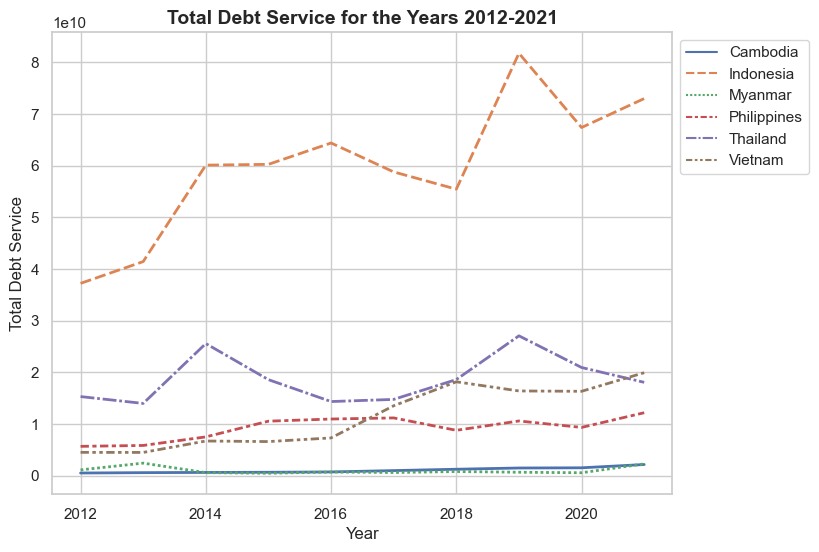

In [14]:
#debt service trend of SEA countries
plt.figure(figsize=(8,6))
sns.lineplot(data = sea_countries, x='Year', y='Total Debt Service', hue = 'Country Name', style = 'Country Name', linewidth=2)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Total Debt Service for the Years 2012-2021', fontsize=14, fontweight='bold')
plt.show()

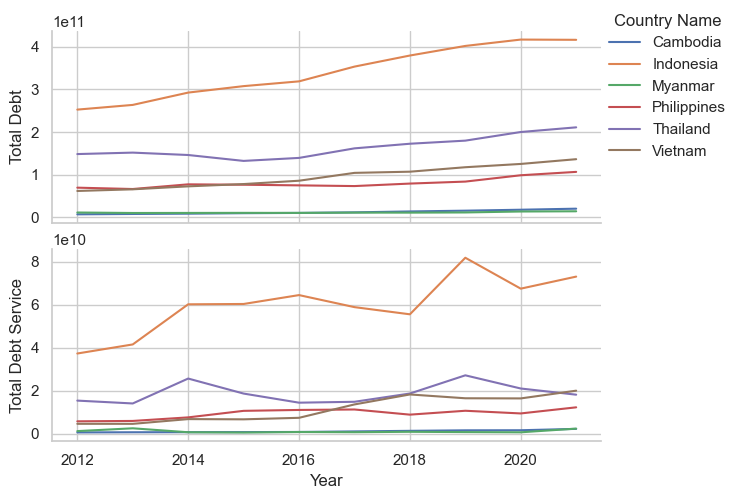

In [15]:
#this will plot the two lineplots above for easier comparison
x =['Year']
y=['Total Debt', 'Total Debt Service']
g = sns.PairGrid(sea_countries, hue='Country Name', x_vars=x, y_vars=y, aspect=2.5)
g.map(sns.lineplot)
g.tight_layout()
g.add_legend(loc = 'upper right')

According to the graphical representations shown above, it appears that there has been a persistent rise in the external debts of the majority of South East Asian nations over time. However, within the stated timeframe, there has been a lack of substantial enhancement in their capacity to meet their debt obligations.

#### Debt vs Debt service trend of Indonesia and Myanmar

This subsection  will try to compare the difference in the Total Debt and Total Debt Service of two countries that have the largest and smallest average debt and average debt service, namely, Indonesia and Myanmar. According to the World Bank, [Indonesia](https://www.worldbank.org/en/country/indonesia/overview) was moved from an upper-middle income to a lower-middle income country in 2021 while [Myanmar](https://data.worldbank.org/?locations=MM-XN) is also classified as a lower-middle-income country.

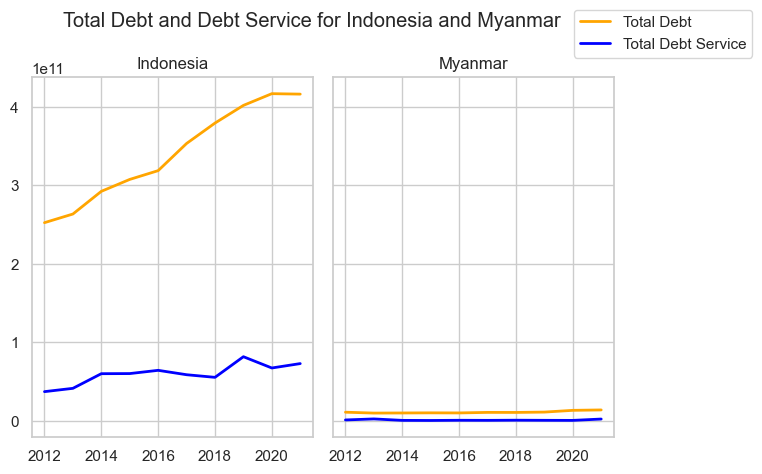

In [16]:
#this would plot the debt and debt service trend of the two countries
ind = sea_countries[sea_countries['Country Name']== 'Indonesia']
mmr = sea_countries[sea_countries['Country Name']== 'Myanmar']

fig, axs = plt.subplots(1,2, sharey=True)
axs[0].plot(ind['Year'], ind['Total Debt'], label='Total Debt', linewidth=2, color='orange')
axs[0].plot(ind['Year'], ind['Total Debt Service'], label='Total Debt Service', linewidth=2, color='blue')
axs[0].get_xlabel()
axs[0].set_title('Indonesia')

axs[1].plot(mmr['Year'], mmr['Total Debt'], label='Total Debt', linewidth=2, color='orange')
axs[1].plot(mmr['Year'], mmr['Total Debt Service'], label='Total Debt Service', linewidth=2, color='blue')
axs[0].get_xlabel()
axs[1].set_title('Myanmar')
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.2,1))
fig.suptitle('Total Debt and Debt Service for Indonesia and Myanmar')
fig.tight_layout()

plt.show()


#### Philippines' Debt vs Debt Service

This subsection will try to analyze Philippines' external debt service relative to its external debt and see what year the outlier in the external debt falls (as was depicted in the boxplot in the previous section).

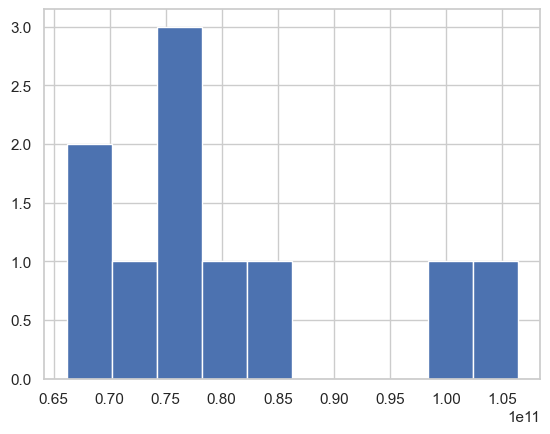

In [17]:
#philippines data
phl = sea_countries[sea_countries['Country Name']=='Philippines']
plt.hist(phl['Total Debt'], bins=10)
plt.show()

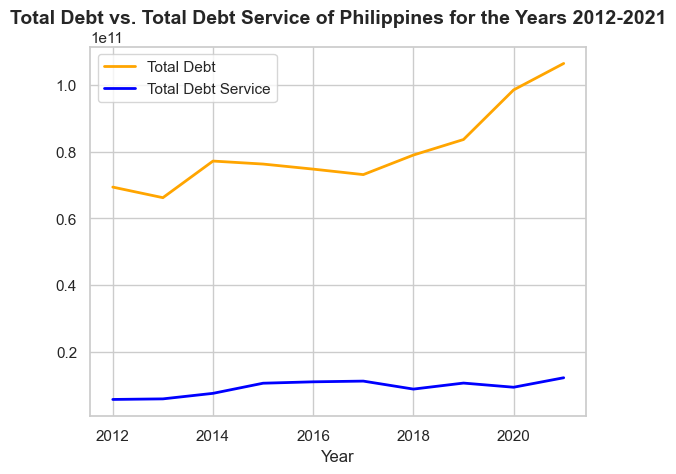

In [18]:
#function that would return total debt and total debt service of a specific country
def debt_vs_debtserv(y1, y2, country, df):
    # filter dataframe by country
    country_df = df[df['Country Name'] == country]
    
    # create lineplots for total debt and total debt service
    fig, ax = plt.subplots()
    ax.plot(country_df['Year'], country_df[y1], label='Total Debt', linewidth=2, color='orange')
    ax.plot(country_df['Year'], country_df[y2], label='Total Debt Service', linewidth=2, color='blue')
    ax.set_xlabel('Year')
    ax.set_title('Total Debt vs. Total Debt Service of {} for the Years 2012-2021'.format(country), fontsize=14, fontweight='bold')
    ax.legend()
    plt.show()

#call function and save into variable
philippines = debt_vs_debtserv('Total Debt', 'Total Debt Service', 'Philippines', sea_countries)

As shown in the graph above, there was a spike in the country's debt between the years 2019 to 2021. This may explain the presence of outliers in the country's distribution of debt.

## Conclusion <a class="anchor" id="conclusion"></a>
The analysis showed that there is variation in the data distribution among the Southeast Asian countries. Indonesia was identified as having the largest external debt and debt service, whereas Cambodia was found to have the smallest. The analysis has also suggested that these nations are experiencing a high level of external debt in comparison to their capacity to fulfill their debt obligations. Finally, the data indicates a consistent increase in each country's debt over the last decade, while the level of their ability to meet their debt obligations has not shown significant improvement during the same period.

## Limitations <a class="anchor" id="limitations"></a>

This analysis only depicted the overview of the debt situation of the said countries in relation to their ability to meet those debt obligations. The possible reasons for the findings as well as recommendations were not part of the scope of the analysis.